## Importing Libraries

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [88]:
df=pd.read_csv("hotel_booking.csv")

In [89]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## droping unwanted features

In [91]:
df.drop(["name","email","phone-number","credit_card"],axis=1,inplace=True)

In [92]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

## droping the features which has most null values

In [93]:
df.drop(["agent","company"],axis=1,inplace=True)
df.dropna(inplace=True)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118898 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118898 non-null  object 
 1   is_canceled                     118898 non-null  int64  
 2   lead_time                       118898 non-null  int64  
 3   arrival_date_year               118898 non-null  int64  
 4   arrival_date_month              118898 non-null  object 
 5   arrival_date_week_number        118898 non-null  int64  
 6   arrival_date_day_of_month       118898 non-null  int64  
 7   stays_in_weekend_nights         118898 non-null  int64  
 8   stays_in_week_nights            118898 non-null  int64  
 9   adults                          118898 non-null  int64  
 10  children                        118898 non-null  float64
 11  babies                          118898 non-null  int64  
 12  meal            

In [95]:
df["reservation_status_date"]=pd.to_datetime(df["reservation_status_date"])

In [96]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


In [97]:
df.describe(include='object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,118898,118898,118898,118898,118898,118898,118898,118898,118898,118898,118898
unique,2,12,5,177,7,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79302,13852,91863,48586,56402,97730,85601,73863,104163,89174,74745


In [98]:
for col in df.describe(include="object").columns:
    print(col)
    print(df[col].unique())
    print("-"*50)

hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'ROU' 'NOR' 'OMN' 'ARG' 'POL' 'DEU'
 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST' 'CZE'
 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR' 'UKR'
 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO' 'ISR'
 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM' 'HRV'
 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY' 'KWT'
 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN' 'SYC'
 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB' 'CMR'
 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 

In [99]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


<AxesSubplot:>

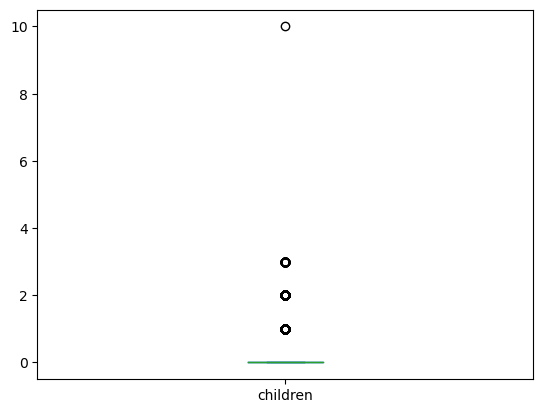

In [100]:
df["children"].plot(kind="box")

<AxesSubplot:>

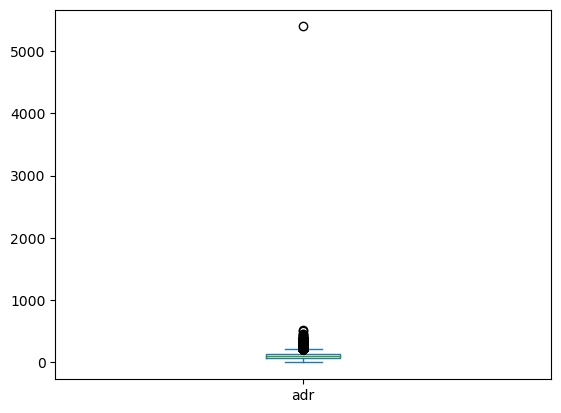

In [101]:
df["adr"].plot(kind="box")

## Removing The Outliers

In [102]:
df=df[df["children"]<8]

In [103]:
df=df[df["adr"]<4000]

In [104]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118896.000000,118896.000000,118896.000000,118896.000000,118896.000000,118896.000000,118896.000000,118896.000000,118896.000000,118896.000000,118896.000000,118896.000000,118896.000000,118896.000000,118896.000000,118896.000000,118896.000000,118896.000000
mean,0.371341,104.312433,2016.157667,27.166658,15.800834,0.928879,2.502094,1.858389,0.104125,0.007948,0.032011,0.087143,0.131636,0.221160,2.330793,101.958421,0.061886,0.571684
std,0.483166,106.903924,0.707457,13.590022,8.780351,0.996181,1.900054,0.578580,0.398143,0.097381,0.176030,0.845876,1.484684,0.652766,17.630598,48.091316,0.244174,0.792682
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,3.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,510.000000,8.000000,5.000000


## Data Analysis and Visualization

0    0.628659
1    0.371341
Name: is_canceled, dtype: float64


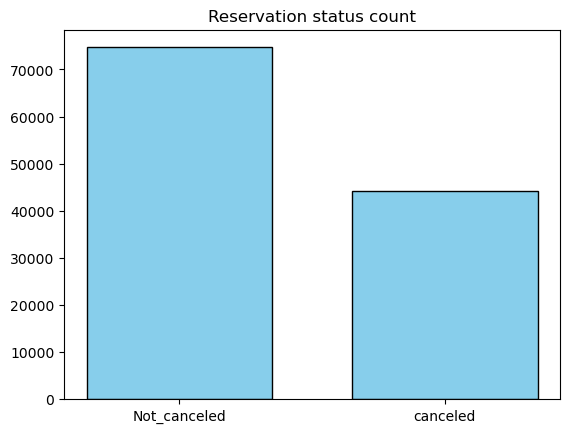

In [105]:
canceled_perc=df["is_canceled"].value_counts(normalize=True)
print(canceled_perc)

plt.title("Reservation status count")
plt.bar(["Not_canceled","canceled"],df["is_canceled"].value_counts(),color="skyblue",edgecolor="k",width=0.7)

plt.show()

#### The above graph shows the percentage of reservation that are canceled and those that are not . There are 37% of custmers who canceled their reservation .

0    0.720268
1    0.279732
Name: is_canceled, dtype: float64
0    0.582918
1    0.417082
Name: is_canceled, dtype: float64


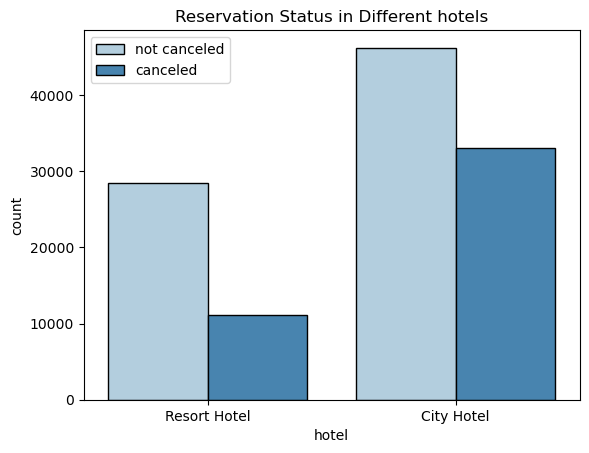

In [106]:
resort_hotel=df[df["hotel"]=="Resort Hotel"]
rh=resort_hotel["is_canceled"].value_counts(normalize=True)
print(rh)

city_hotel=df[df["hotel"]=="City Hotel"]
ch=city_hotel["is_canceled"].value_counts(normalize=True)
print(ch)

res_diff_hotel=sns.countplot(x="hotel",hue="is_canceled",data=df,palette="Blues",edgecolor="k")
plt.title("Reservation Status in Different hotels")
plt.legend(["not canceled","canceled"])
plt.show()

#### In comparision to resort hotel ,city hotel have more bookings as well as more cancelations .It's possible that resort hotels are more expensive than city hotel

In [107]:
resort_hotel = resort_hotel.groupby("reservation_status_date")[["adr"]].mean()
city_hotel = city_hotel.groupby("reservation_status_date")[["adr"]].mean()

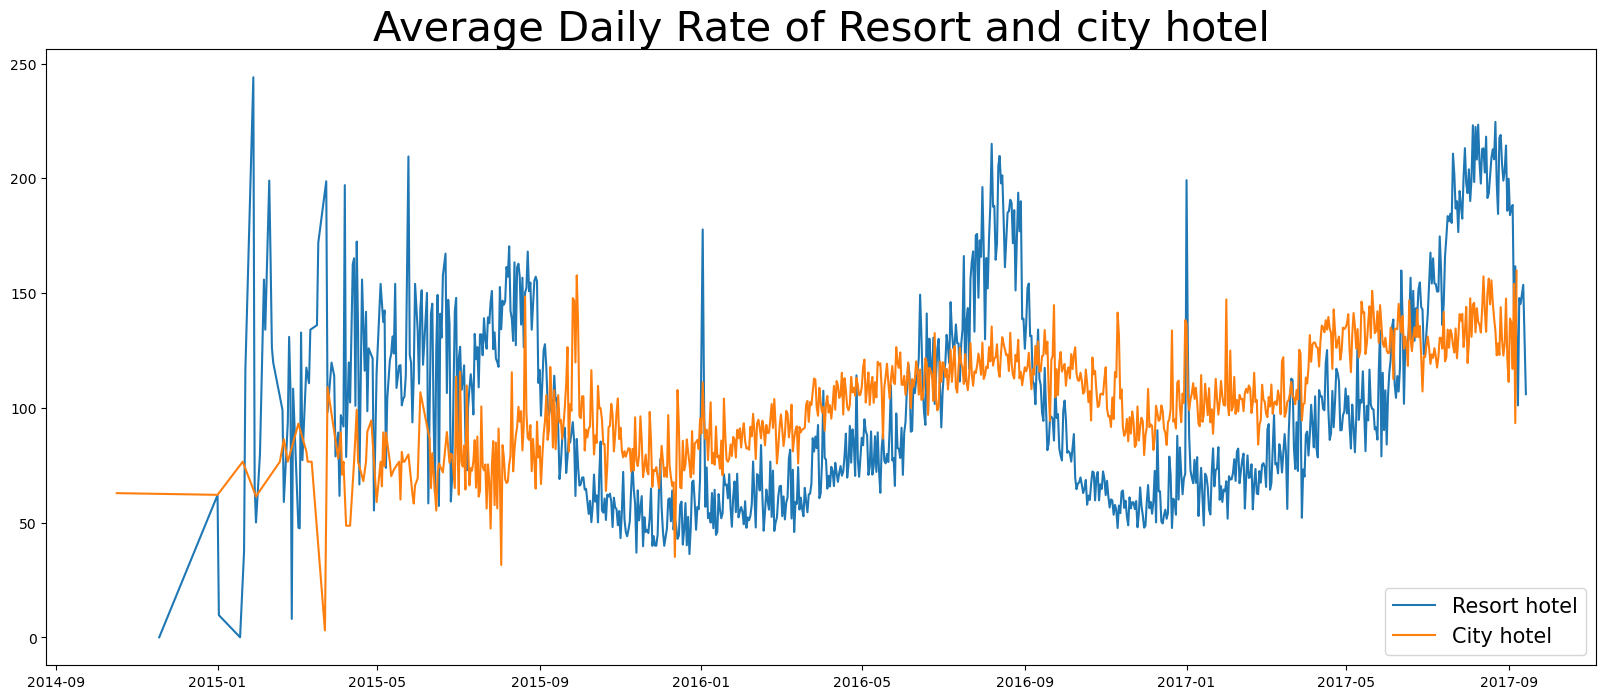

In [108]:
plt.figure(figsize=(20,8))
plt.title("Average Daily Rate of Resort and city hotel",fontsize=30)
plt.plot(resort_hotel.index,resort_hotel["adr"],label="Resort hotel")
plt.plot(city_hotel.index,city_hotel["adr"],label="City hotel")
plt.legend(fontsize=15)
plt.show()

#### the above graph shows that ,the average daily rate for City hotel is less than Resort hotel.

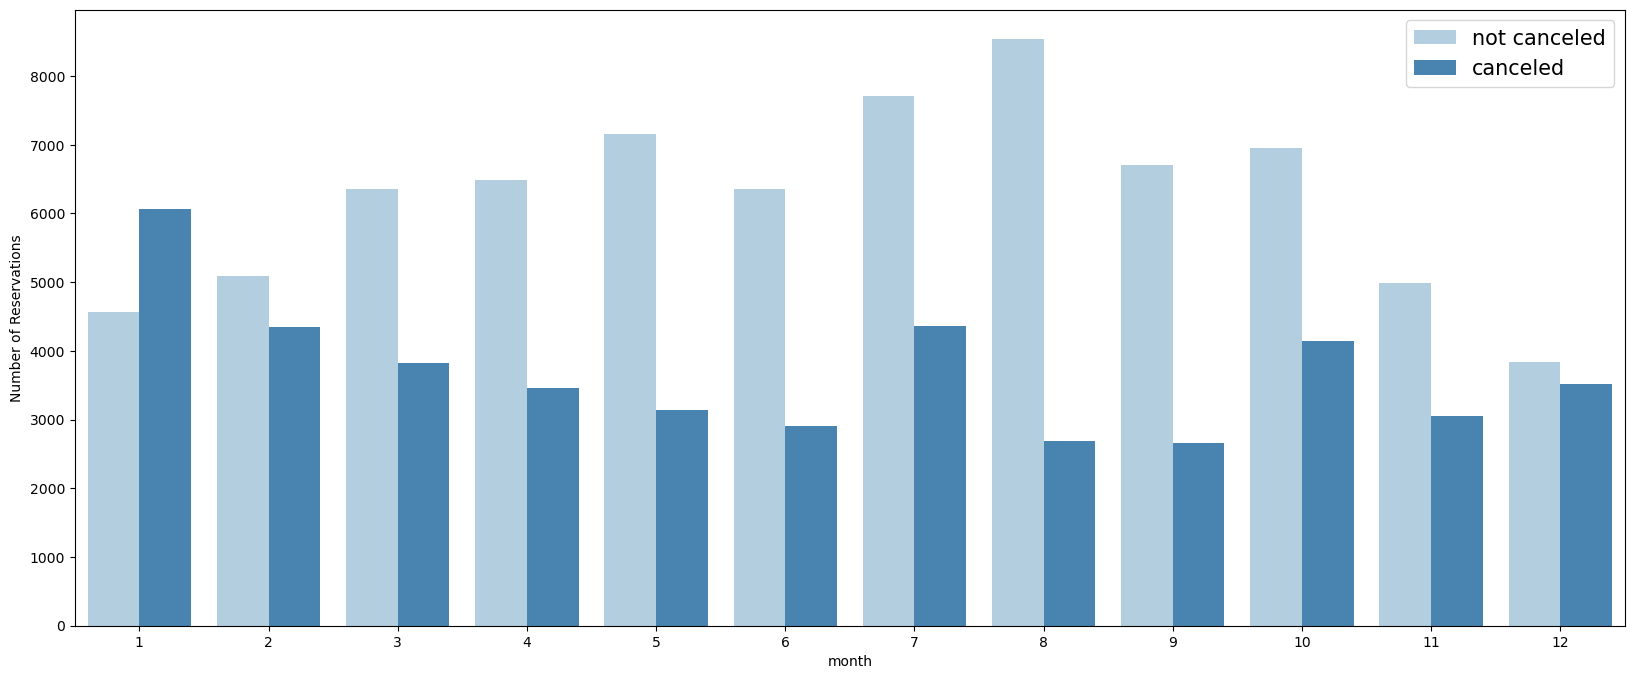

In [109]:
df["month"]=df["reservation_status_date"].dt.month
plt.figure(figsize=(20,8))

ax=sns.countplot(x="month",hue='is_canceled',data=df,palette="Blues")
plt.ylabel("Number of Reservations")
plt.legend(["not canceled","canceled"],fontsize=15)
plt.show()

#### from the above graph we can see that the number of confirmed reservations are in the month of August and number of canceled reservation is more in the month of January and September is the month with less canceled reservations.

<AxesSubplot:title={'center':'ADR for each month'}, xlabel='month', ylabel='adr'>

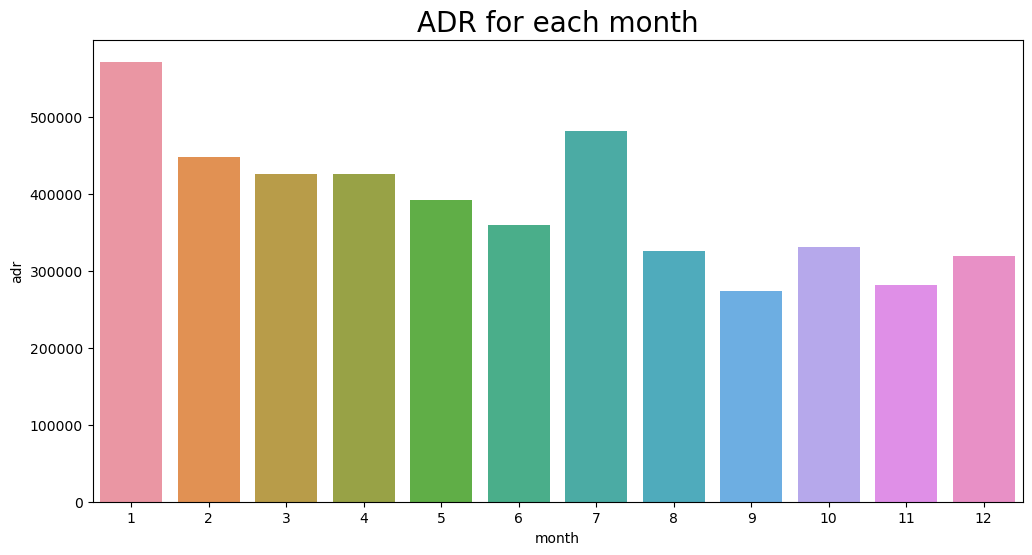

In [110]:
plt.figure(figsize=(12,6))
plt.title('ADR for each month',fontsize=20)
sns.barplot("month","adr",data=df[df["is_canceled"]==1].groupby("month")[["adr"]].sum().reset_index())

####  This graph shows that the cancelations are most common when prices are high and less common when prices are low

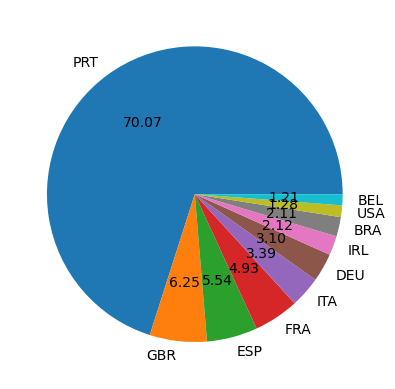

In [111]:
cancelled_data=df[df['is_canceled']==1]
top_10_countries=cancelled_data["country"].value_counts()[:10]
plt.pie(top_10_countries,autopct="%.2f",labels=top_10_countries.index)
plt.show()

#### The above pie chart shows the countries which has highest cancelation rate.Portugal is the country with highest cancelation rate.

In [112]:
df['market_segment'].value_counts()

Online TA        56402
Offline TA/TO    24158
Groups           19806
Direct           12448
Corporate         5111
Complementary      734
Aviation           237
Name: market_segment, dtype: int64

In [113]:
df['market_segment'].value_counts(normalize=True)

Online TA        0.474381
Offline TA/TO    0.203186
Groups           0.166583
Direct           0.104697
Corporate        0.042987
Complementary    0.006173
Aviation         0.001993
Name: market_segment, dtype: float64

In [114]:
cancelled_data['market_segment'].value_counts(normalize=True)

Online TA        0.469706
Groups           0.273992
Offline TA/TO    0.187448
Direct           0.043487
Corporate        0.022151
Complementary    0.002038
Aviation         0.001178
Name: market_segment, dtype: float64

#### This shows the area from which guests are visiting the hotel and making reservations

In [115]:
cancelled_data_adr=cancelled_data.groupby('reservation_status_date')[['adr']].mean()
cancelled_data_adr.reset_index(inplace=True)
cancelled_data_adr.sort_values('reservation_status_date',inplace=True)

In [116]:
not_cancelled_data =df[df['is_canceled']==0]

In [117]:
not_cancelled_data_adr=not_cancelled_data.groupby('reservation_status_date')[['adr']].mean()
not_cancelled_data_adr.reset_index(inplace=True)
not_cancelled_data_adr.sort_values('reservation_status_date',inplace=True)

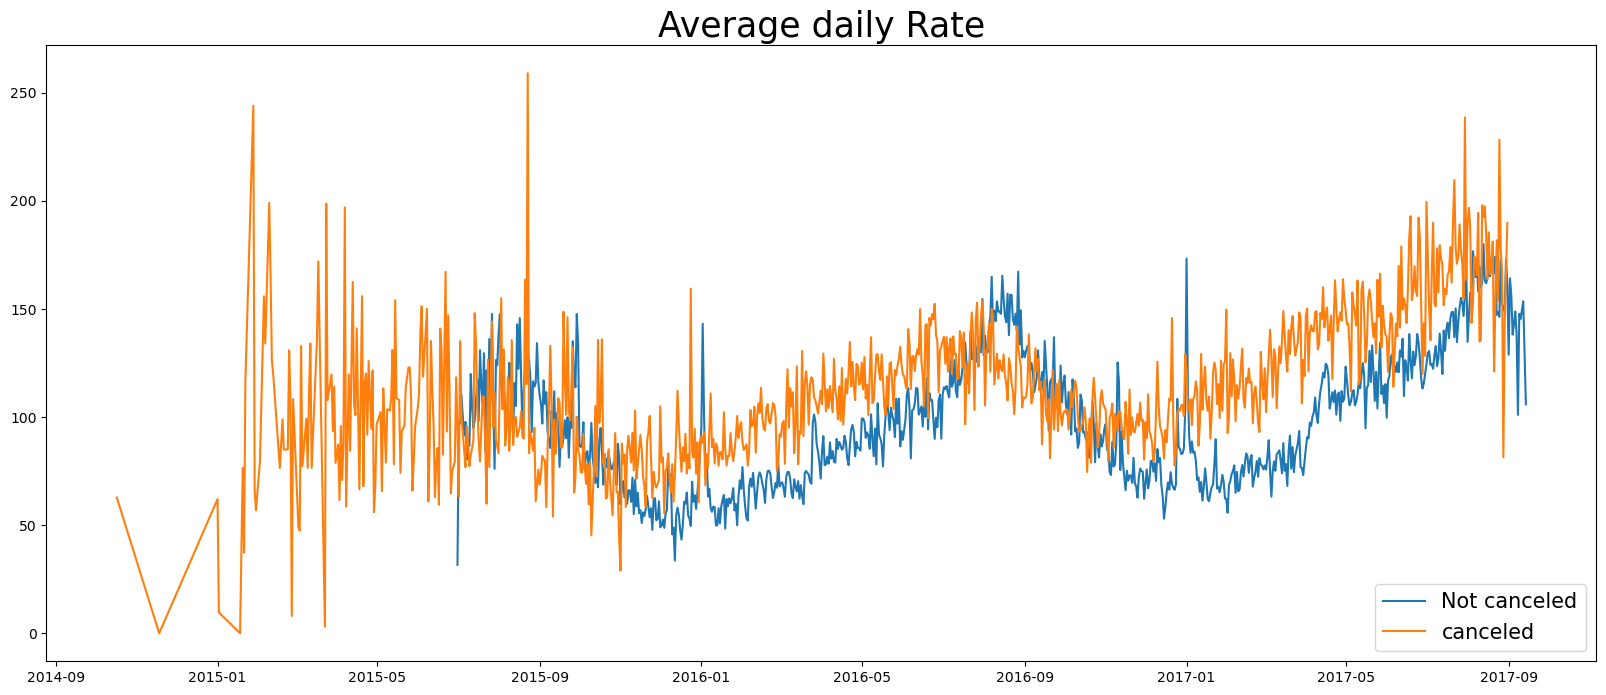

In [118]:
plt.figure(figsize=(20,8))
plt.title("Average daily Rate",fontsize=25)
plt.plot(not_cancelled_data_adr['reservation_status_date'],not_cancelled_data_adr['adr'],label='Not canceled')
plt.plot(cancelled_data_adr['reservation_status_date'],cancelled_data_adr['adr'],label='canceled')
plt.legend(fontsize=15)
plt.show()

In [119]:
# considering the data from 2015-09 to 2017-09

cancelled_data_adr=cancelled_data_adr[(cancelled_data_adr['reservation_status_date']>'2015-09') & (cancelled_data_adr['reservation_status_date']<'2017-09')]
not_cancelled_data_adr=not_cancelled_data_adr[(not_cancelled_data_adr['reservation_status_date']>'2015-09') & (not_cancelled_data_adr['reservation_status_date']<'2017-09')]


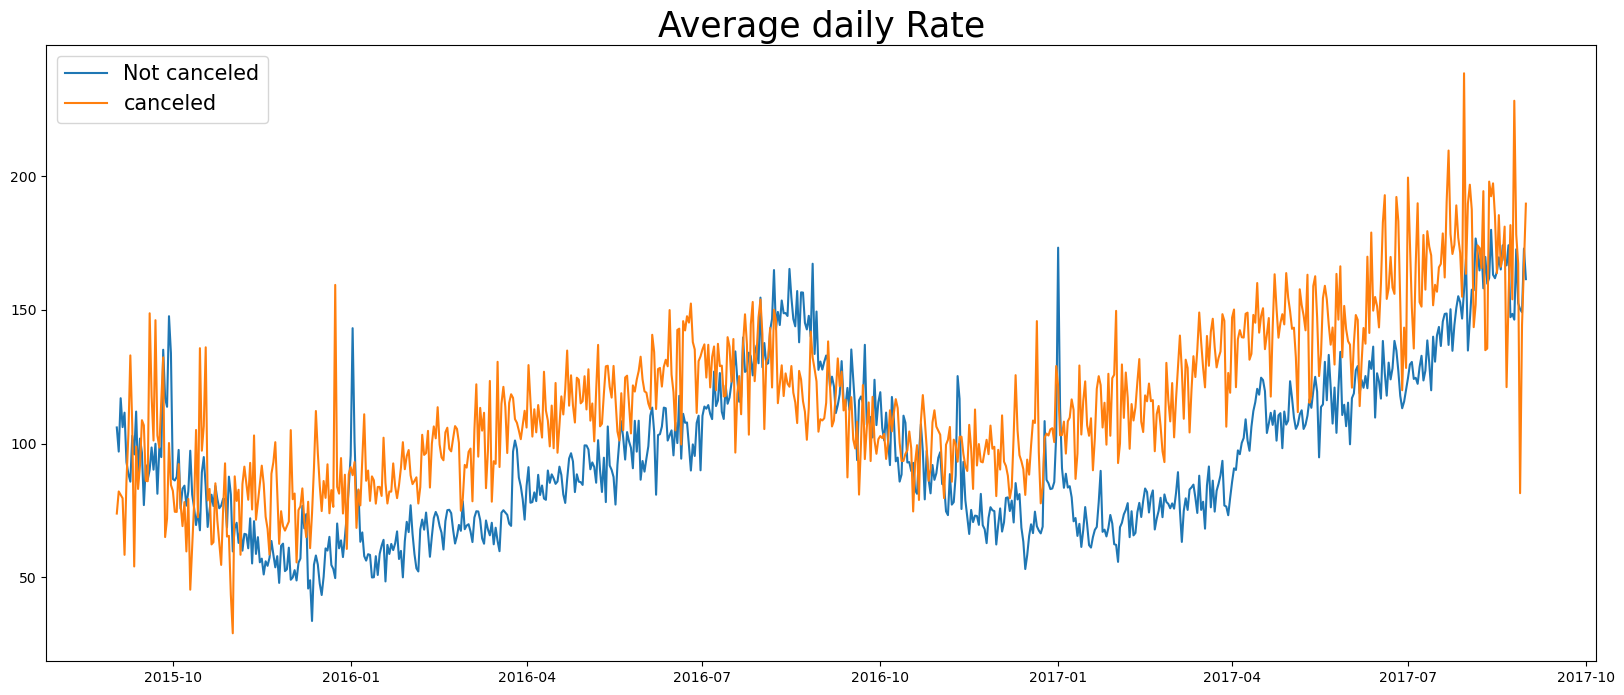

In [120]:
plt.figure(figsize=(20,8))
plt.title("Average daily Rate",fontsize=25)
plt.plot(not_cancelled_data_adr['reservation_status_date'],not_cancelled_data_adr['adr'],label='Not canceled')
plt.plot(cancelled_data_adr['reservation_status_date'],cancelled_data_adr['adr'],label='canceled')
plt.legend(fontsize=15)
plt.show()

#### The graph gives the insight that , reservations are canceled when average daily rate is higher .



## Conclusion : Higher Price Leads to Higher Cancelations